In [1087]:
from scipy.stats import expon
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pandas as pd
import math


## Part 1 (30 points):

A) Let X = amount of time (in minutes) a ice cream man gets a new customer at his cart. The time is known to have an exponential distribution with the average amount of time between a new customer being four minutes.

Plot the probablity density function of the exponential distribution of this ice cream man getting a customer every 4 minutes. (10 points)

You may use the Python libraries to calculate the exponential distribution and to plot. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

B) Now assume on a very hot day the ice cream man gets X customers and each new customer comes every 4 minutes. Generate X samples from the exponential distribution where X = 200 and the rate = 4. Plot the samples on a graph to show how they look graphically. Does it look similar to the graph above? (20 points)

***

In [1088]:
x_axis = list(np.arange(0, 20, 0.1))
expon_pdf=lambda x: expon.pdf(x=x,scale=4)


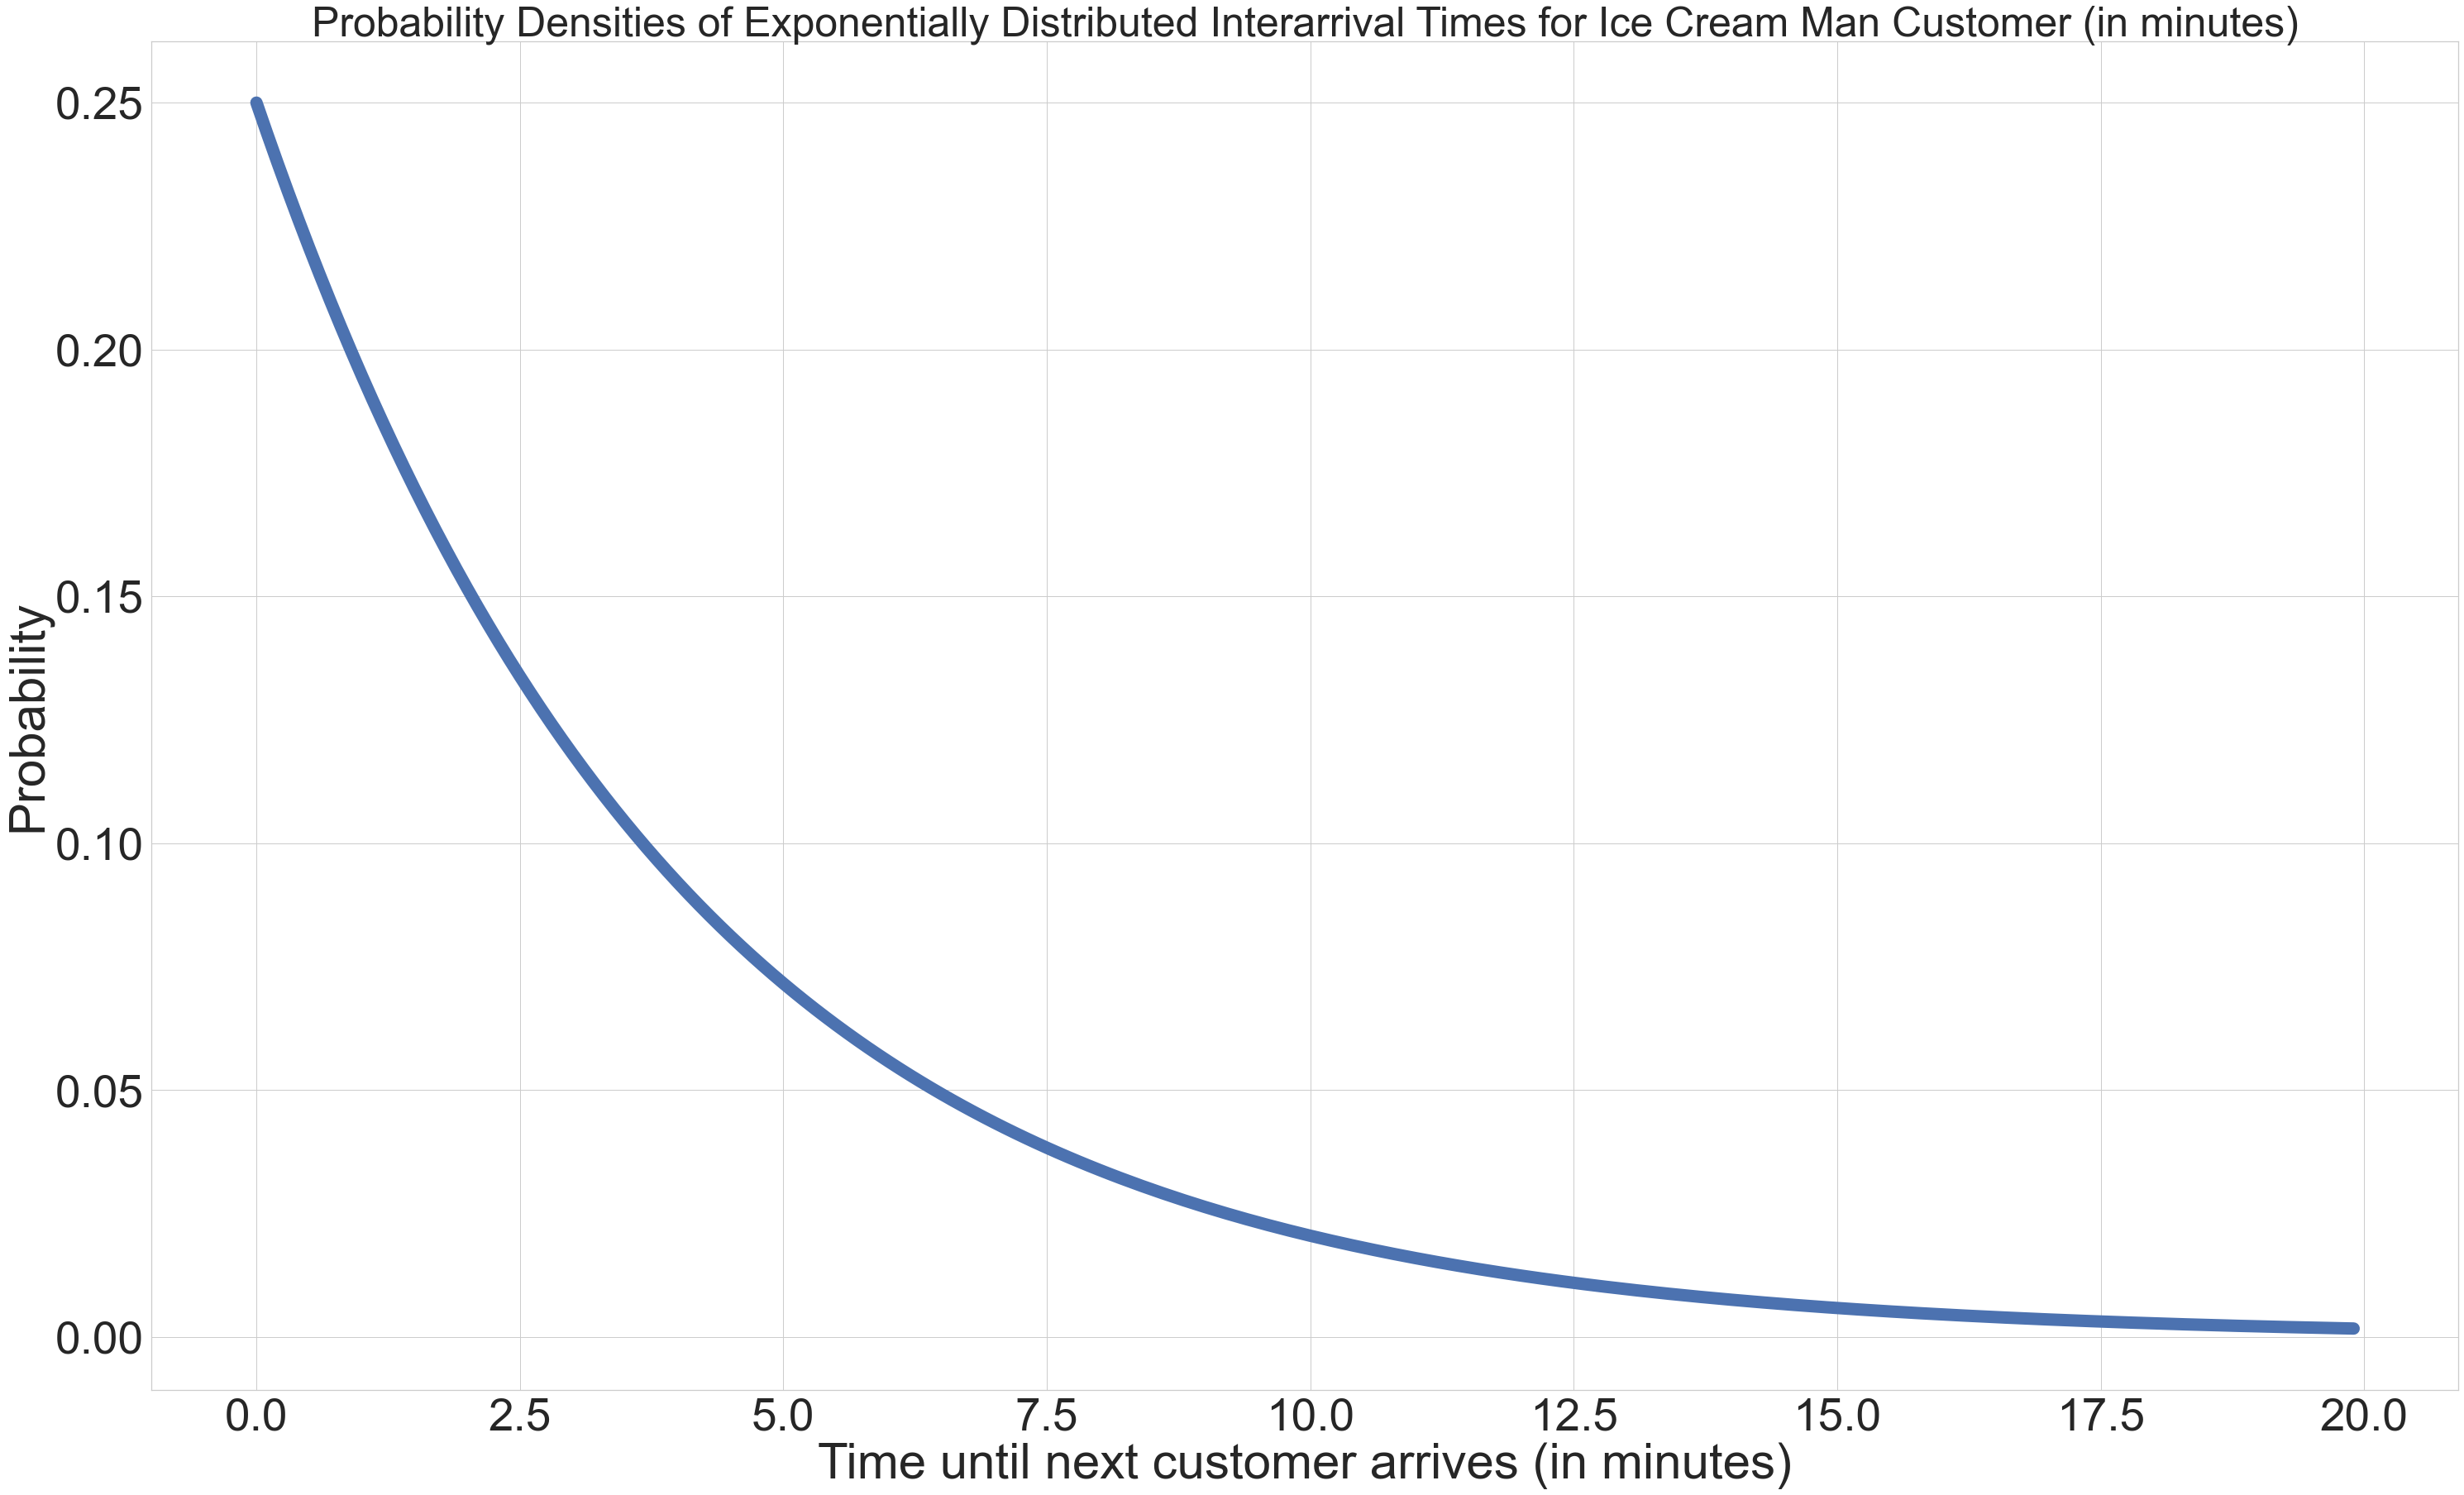

In [1108]:
sns.set(font_scale = 4)
sns.set_theme(style="whitegrid", font_scale=5)
g = sns.lineplot(x=x_axis,y=expon_pdf(x_axis), linewidth = 15)
g = sns.set(rc = {'figure.figsize':(50,30)})
g = plt.xlabel("Time until next customer arrives (in minutes)")
g = plt.ylabel("Probability")
g = plt.title("Probability Densities of Exponentially Distributed Interarrival Times for Ice Cream Man Customer (in minutes)", fontdict={"size":"50"})
plt.show()



B) Now assume on a very hot day the ice cream man gets X customers and each new customer comes every 4 minutes. Generate X samples from the exponential distribution where X = 200 and the rate = 4. Plot the samples on a graph to show how they look graphically. Does it look similar to the graph above? (20 points)

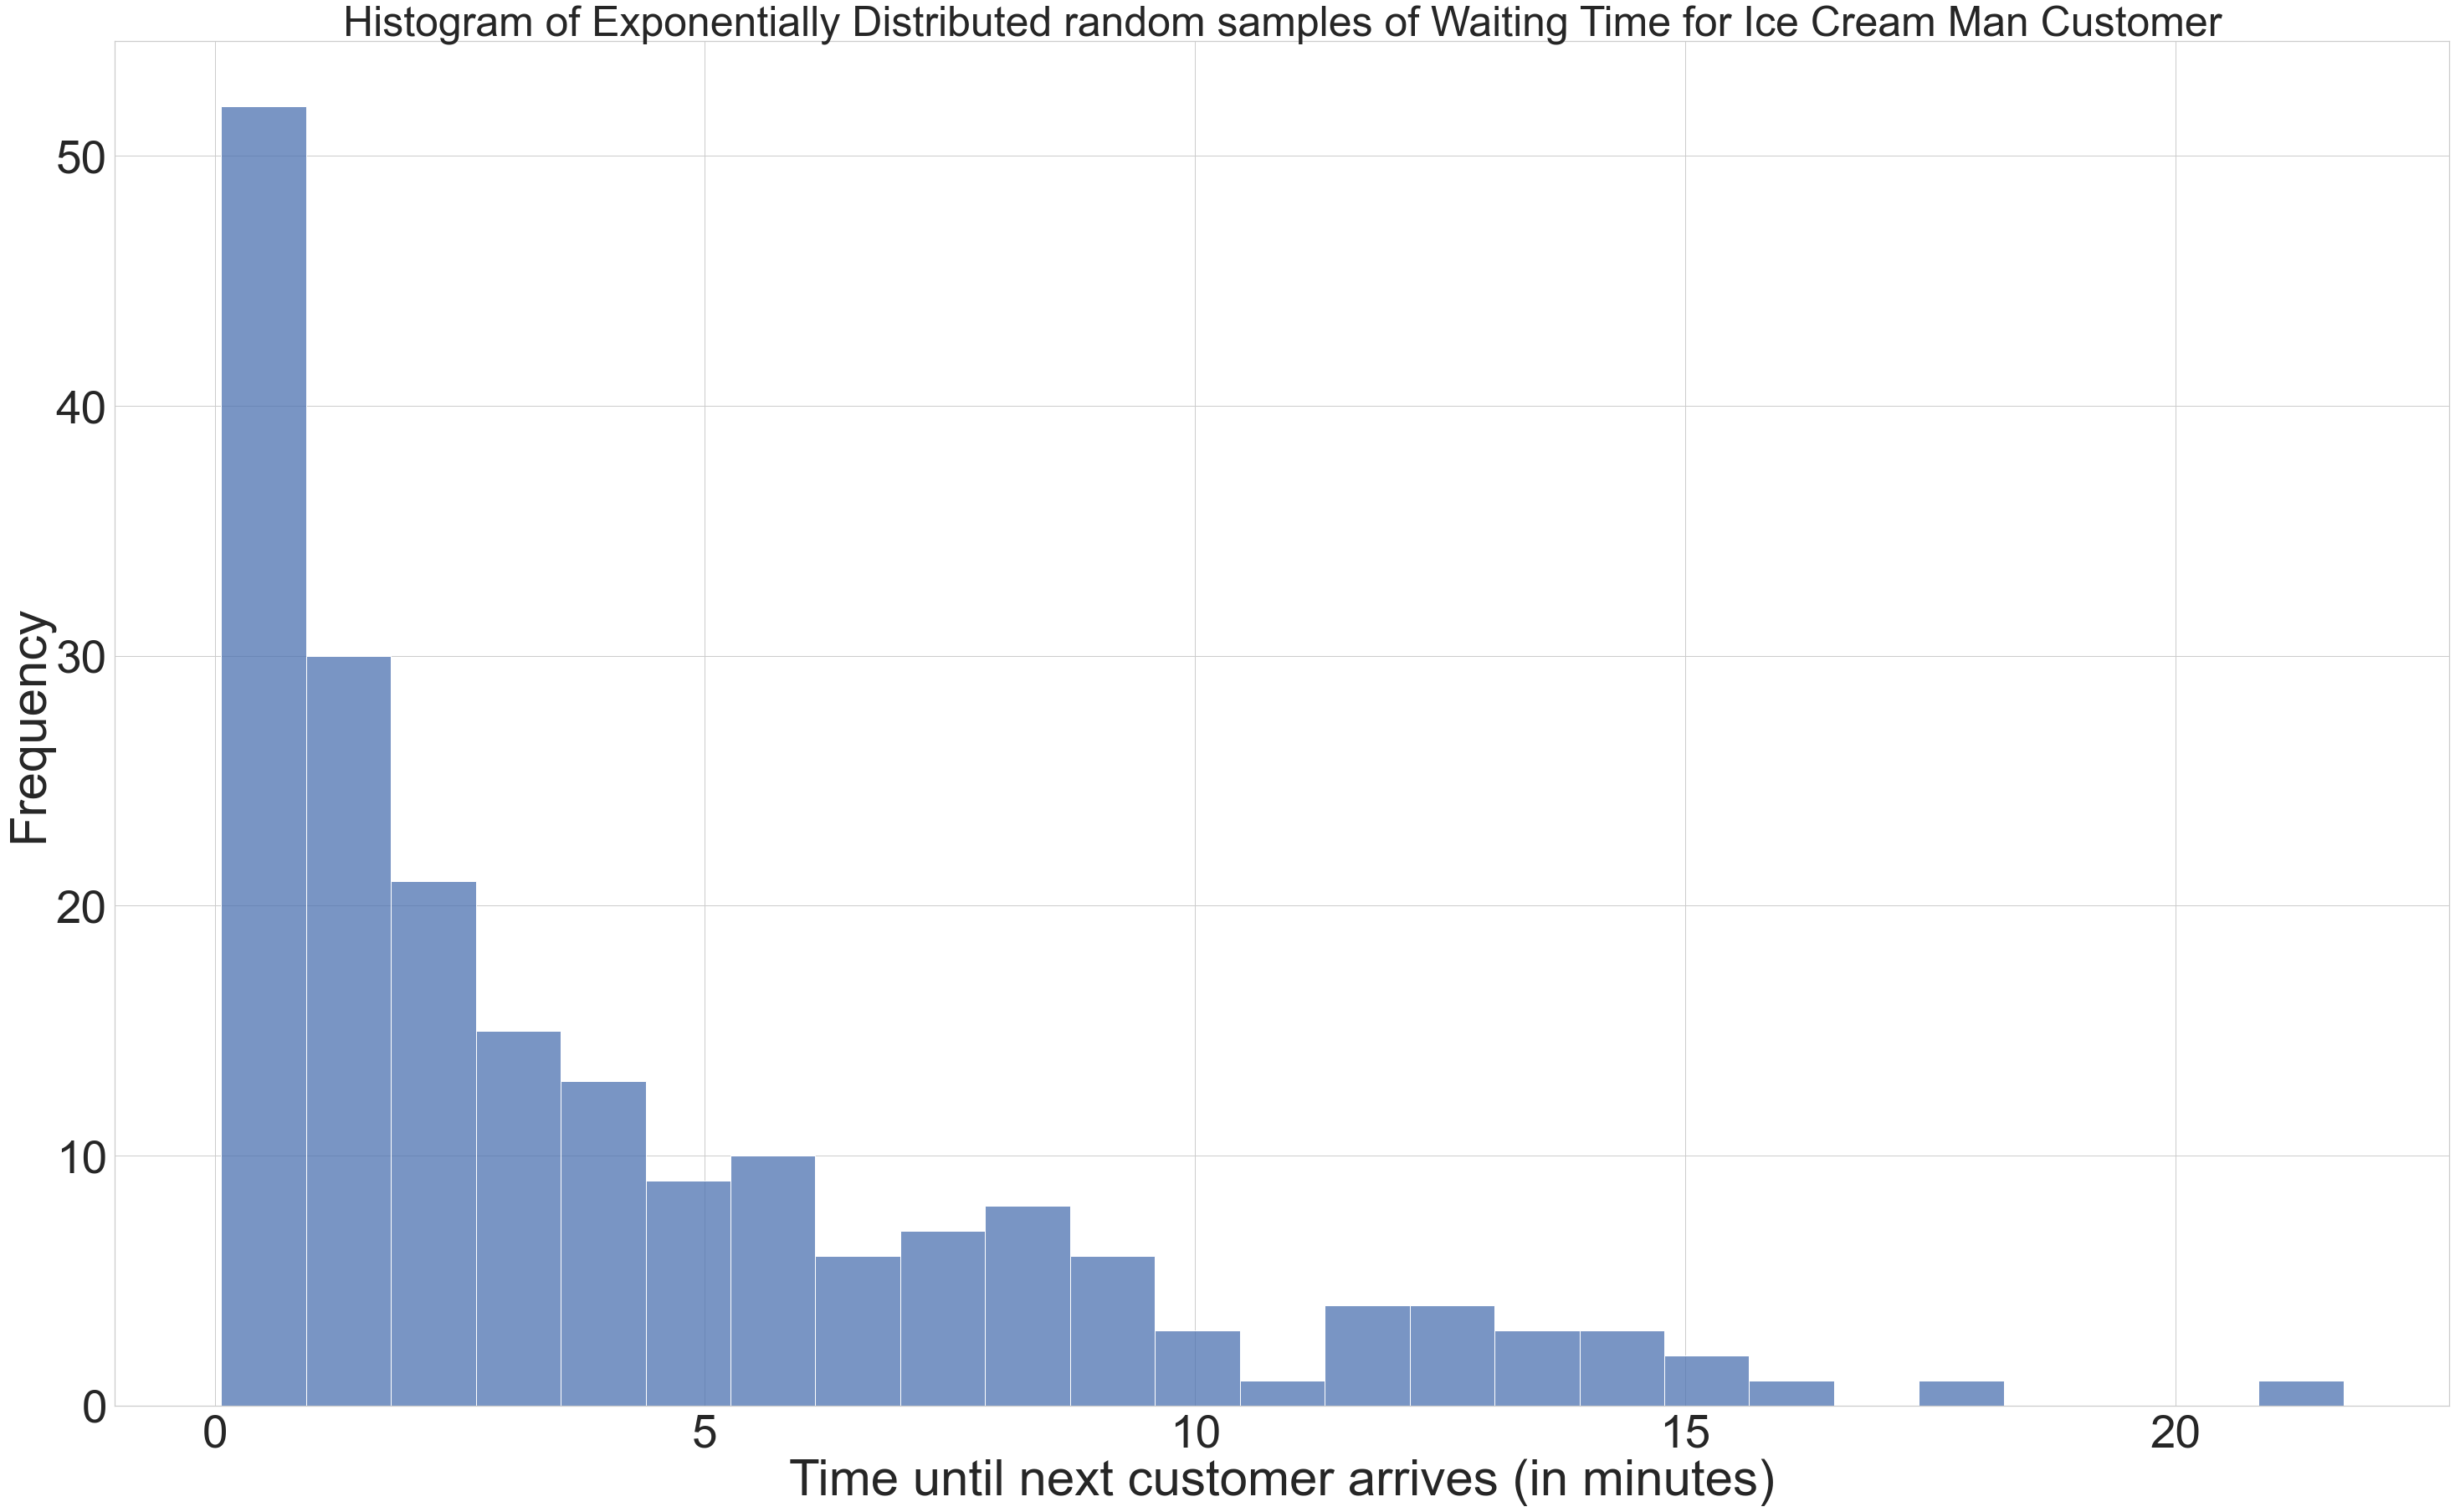

In [1091]:
expon_rvs = expon.rvs(scale=4, size=200)
wait_data=expon_rvs
sns.set(font_scale = 4)
sns.set_theme(style="whitegrid", font_scale=5)
sns.histplot(expon_rvs, bins=25)
g = sns.set(rc = {'figure.figsize':(50,30)})
g = plt.xlabel("Time until next customer arrives (in minutes)")
g = plt.ylabel("Frequency")
g = plt.title("Histogram of Exponentially Distributed random samples of Waiting Time for Ice Cream Man Customer", fontdict={"size":"50"})
plt.show()

The graphs do look similar, the histogram of the frequencies of wait times look like they come from the above probability distribution, and indeed they do.

## Part 2 (30 points):

Assume that you are given the customer data generated in Part 1, implement a Gradient Descent algorithm from scratch that will estimate the Exponential distribution according to the Maximum Likelihood criterion.

Answer the following:

Plot the negative log likelihood of the exponential distribution. (10 points)
What is the lambda MLE of the generated data? (10 points)
Plot the estimated lambda vs iterations to showcase convergence towards the true lambda (10 points)
Read this article to obtain the likelihood and negative log likelihood function of the exponential distribution: https://www.statlect.com/fundamentals-of-statistics/exponential-distribution-maximum-likelihood

***

In [1098]:
def nll(lamb,data):
    """calculates the negative log likelihood function for an input lambda and p_data"""
    n=len(data)
    return(-1*np.log(lamb**n * np.exp(-lamb*sum(data))))



We can solve the maximum likelihood estimator for the exponential distribution analytically, which would yield that $MLE = \lambda^* = n/\sum(x_i)$. The distribution of the NNL function along with the $\lambda^*$ computed from our analytical solution below.

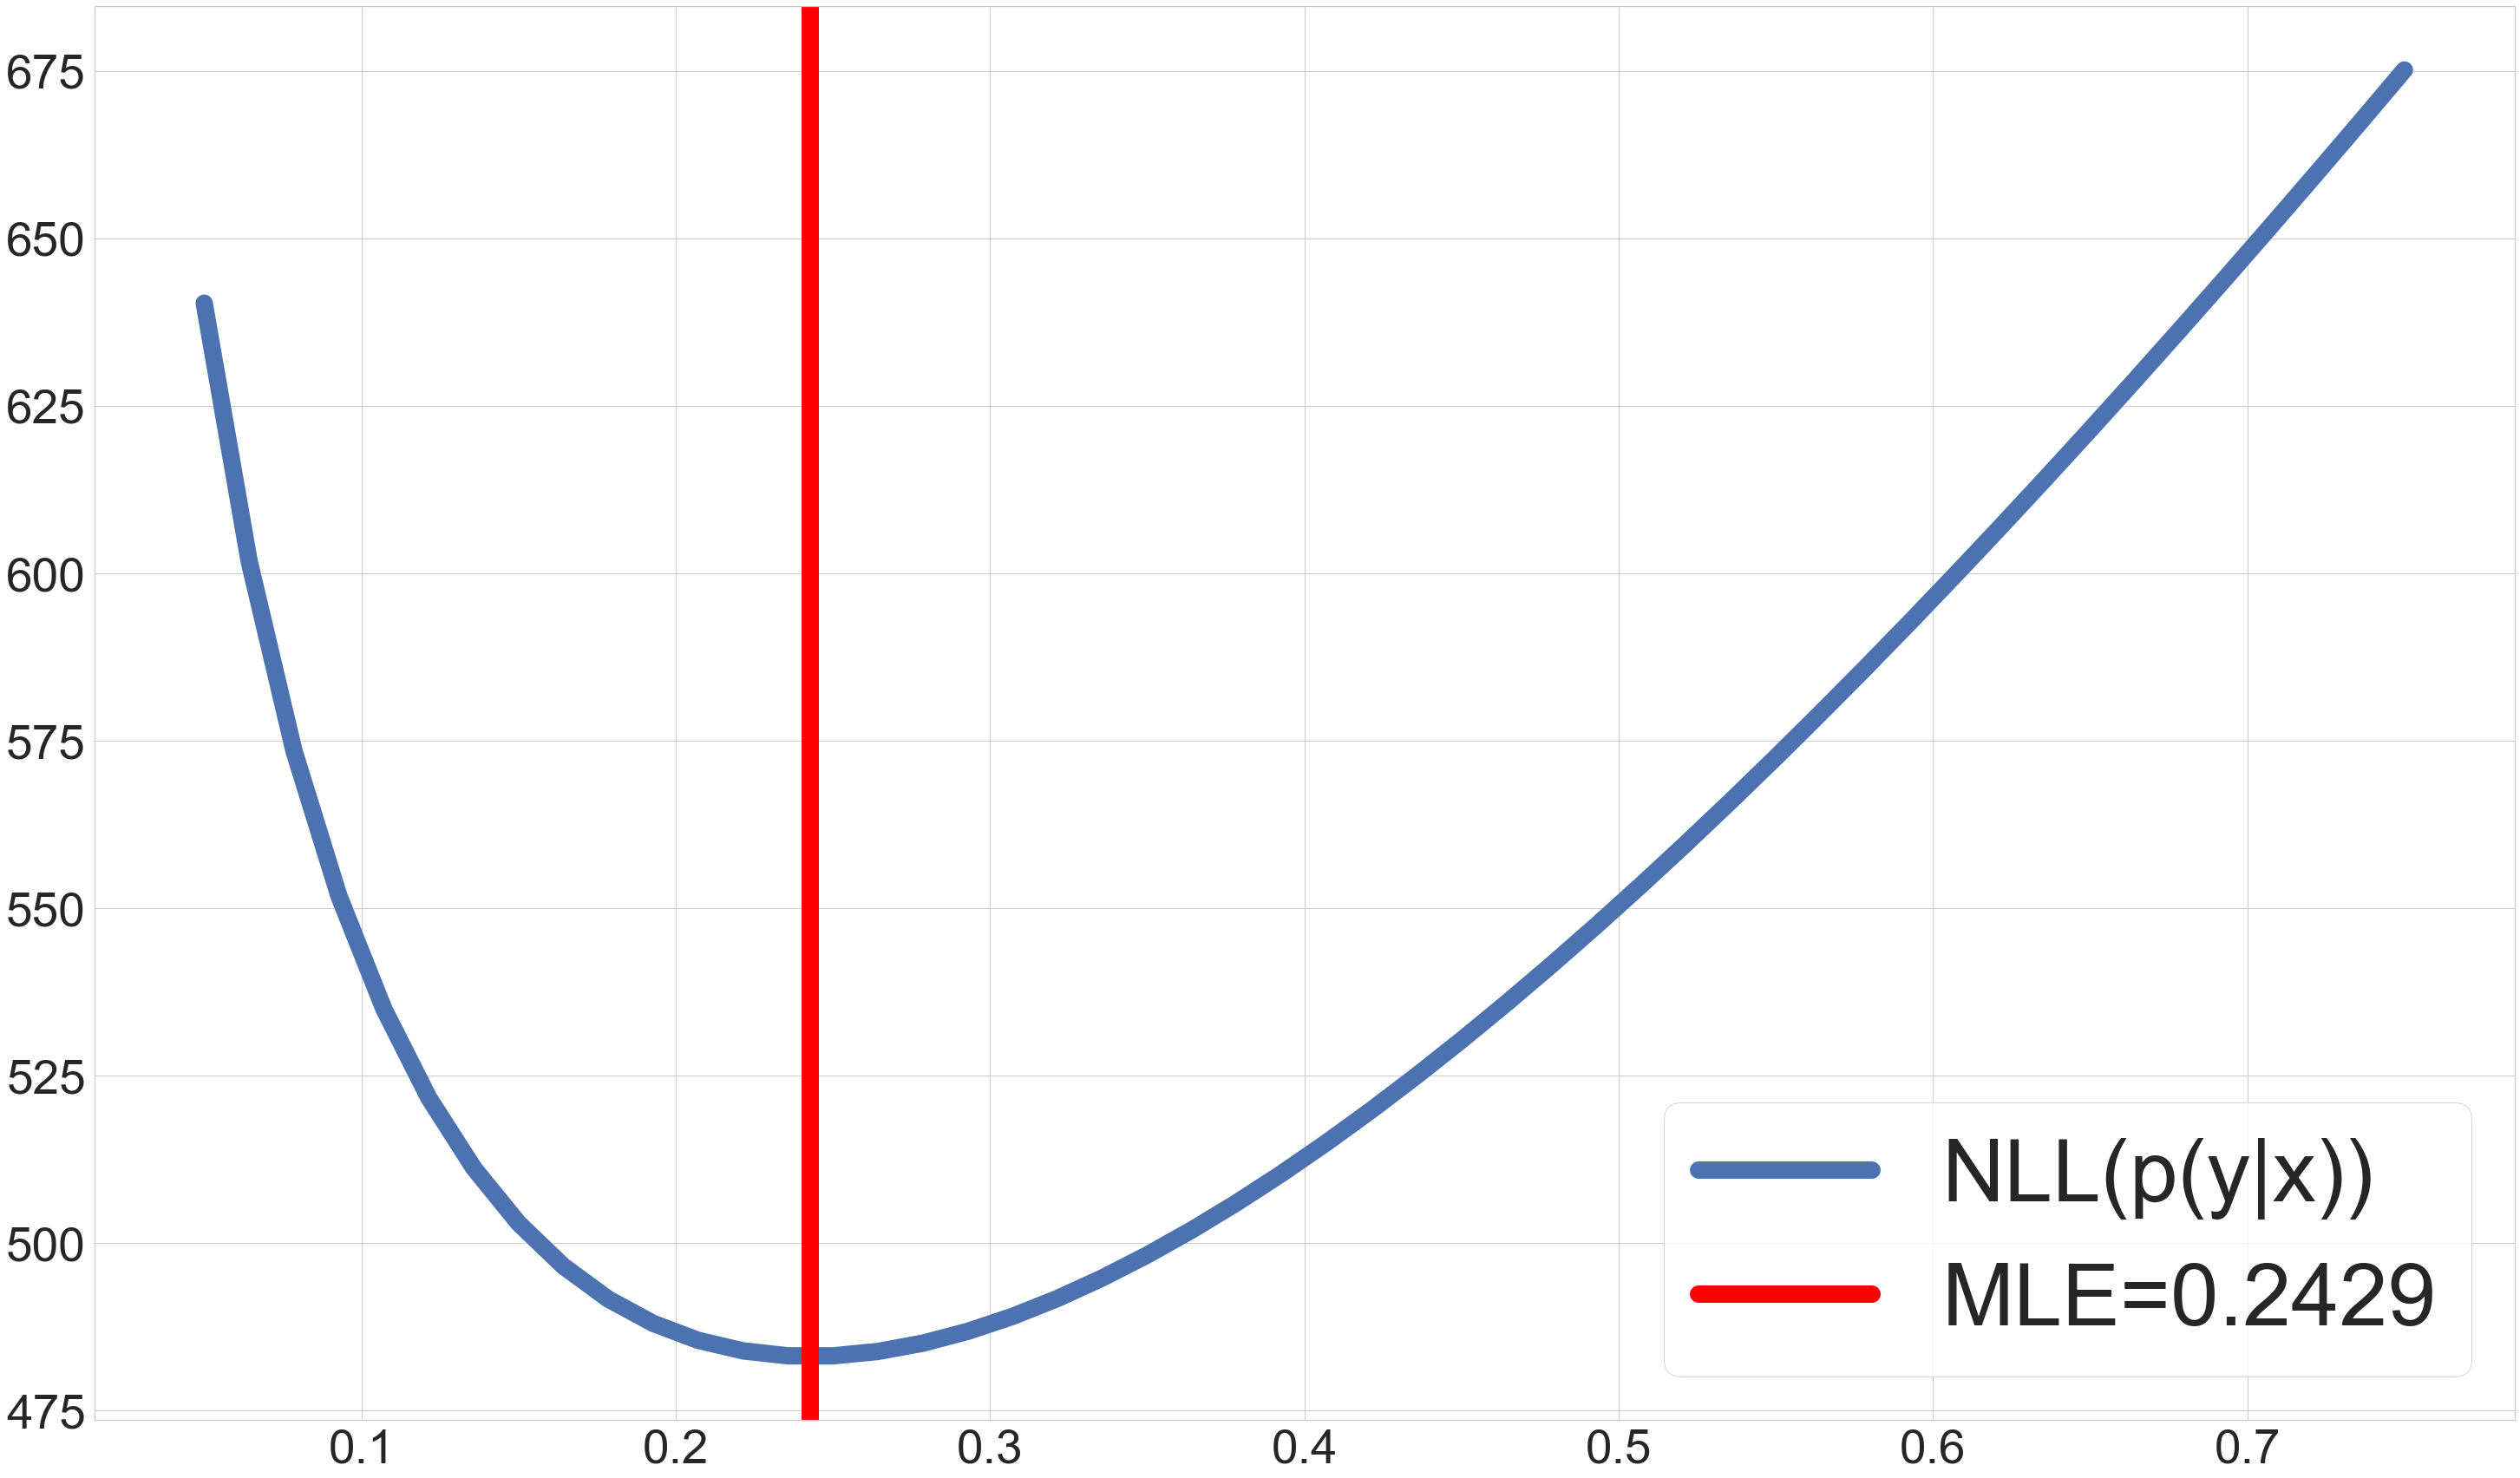

In [1101]:
sns.set(font_scale = 4)
sns.set_theme(style="whitegrid", font_scale=5)
lambda_range = np.linspace(.05,.75)
g=sns.lineplot(x=lambda_range, y=nll(lambda_range, wait_data), linewidth=20)
mle_lamb = len(wait_data)/sum(wait_data)
plt.axvline(mle_lamb, color='red', linewidth=20)
plt.legend(labels=["NLL(p(y|x))",f"MLE={mle_lamb.round(4)}"], title = "", fontsize = '100', title_fontsize = "100")

We will confirm this maximum likelihood estimator using gradient descent. 

In [1106]:
def init_lambda():
    """initialize our guess of lambda."""
    lamb_0 = random.random()
    return lamb_0
    print(f"Lambda: {lamb_0}")

def nll_prime(lamb, data):
    """the derivative of the negative log-likelihood function."""
    n=len(data)
    return ((n/lamb) - sum(data))

def update_lambda(current_lambda, alpha, data):
    """updates our hypothesized for lambda by the increment alpha in the direction of the sign of the derivative."""
    new_lambda = current_lambda - (alpha * - np.sign(nll_prime(current_lambda, data)))
    return new_lambda

def gradient_descent(alpha, iterations):
    """implements gradient descent given learning rate alpha and number of iterations."""
    g=sns.lineplot(x=lambda_range, y=nll(lambda_range, wait_data), linewidth=20)
    current_lamb=init_lambda()
    for i in range(iterations):
        nll_prime(current_lamb, wait_data)
        new_lamb=update_lambda(current_lamb, alpha, wait_data)
        plt.axvline(current_lamb, color='red', linewidth=i/10)
        current_lamb = new_lamb
    return(current_lamb)


An initial guess of lambda is incrementally updated to closer to closer to the maximum likelihood estimator for lambda. We see the gradient descent algorithm converges on a proposed $\lambda$ that is arbitrarily close to the maximum likelihood estimate computed analytically above.

0.24712550469514316

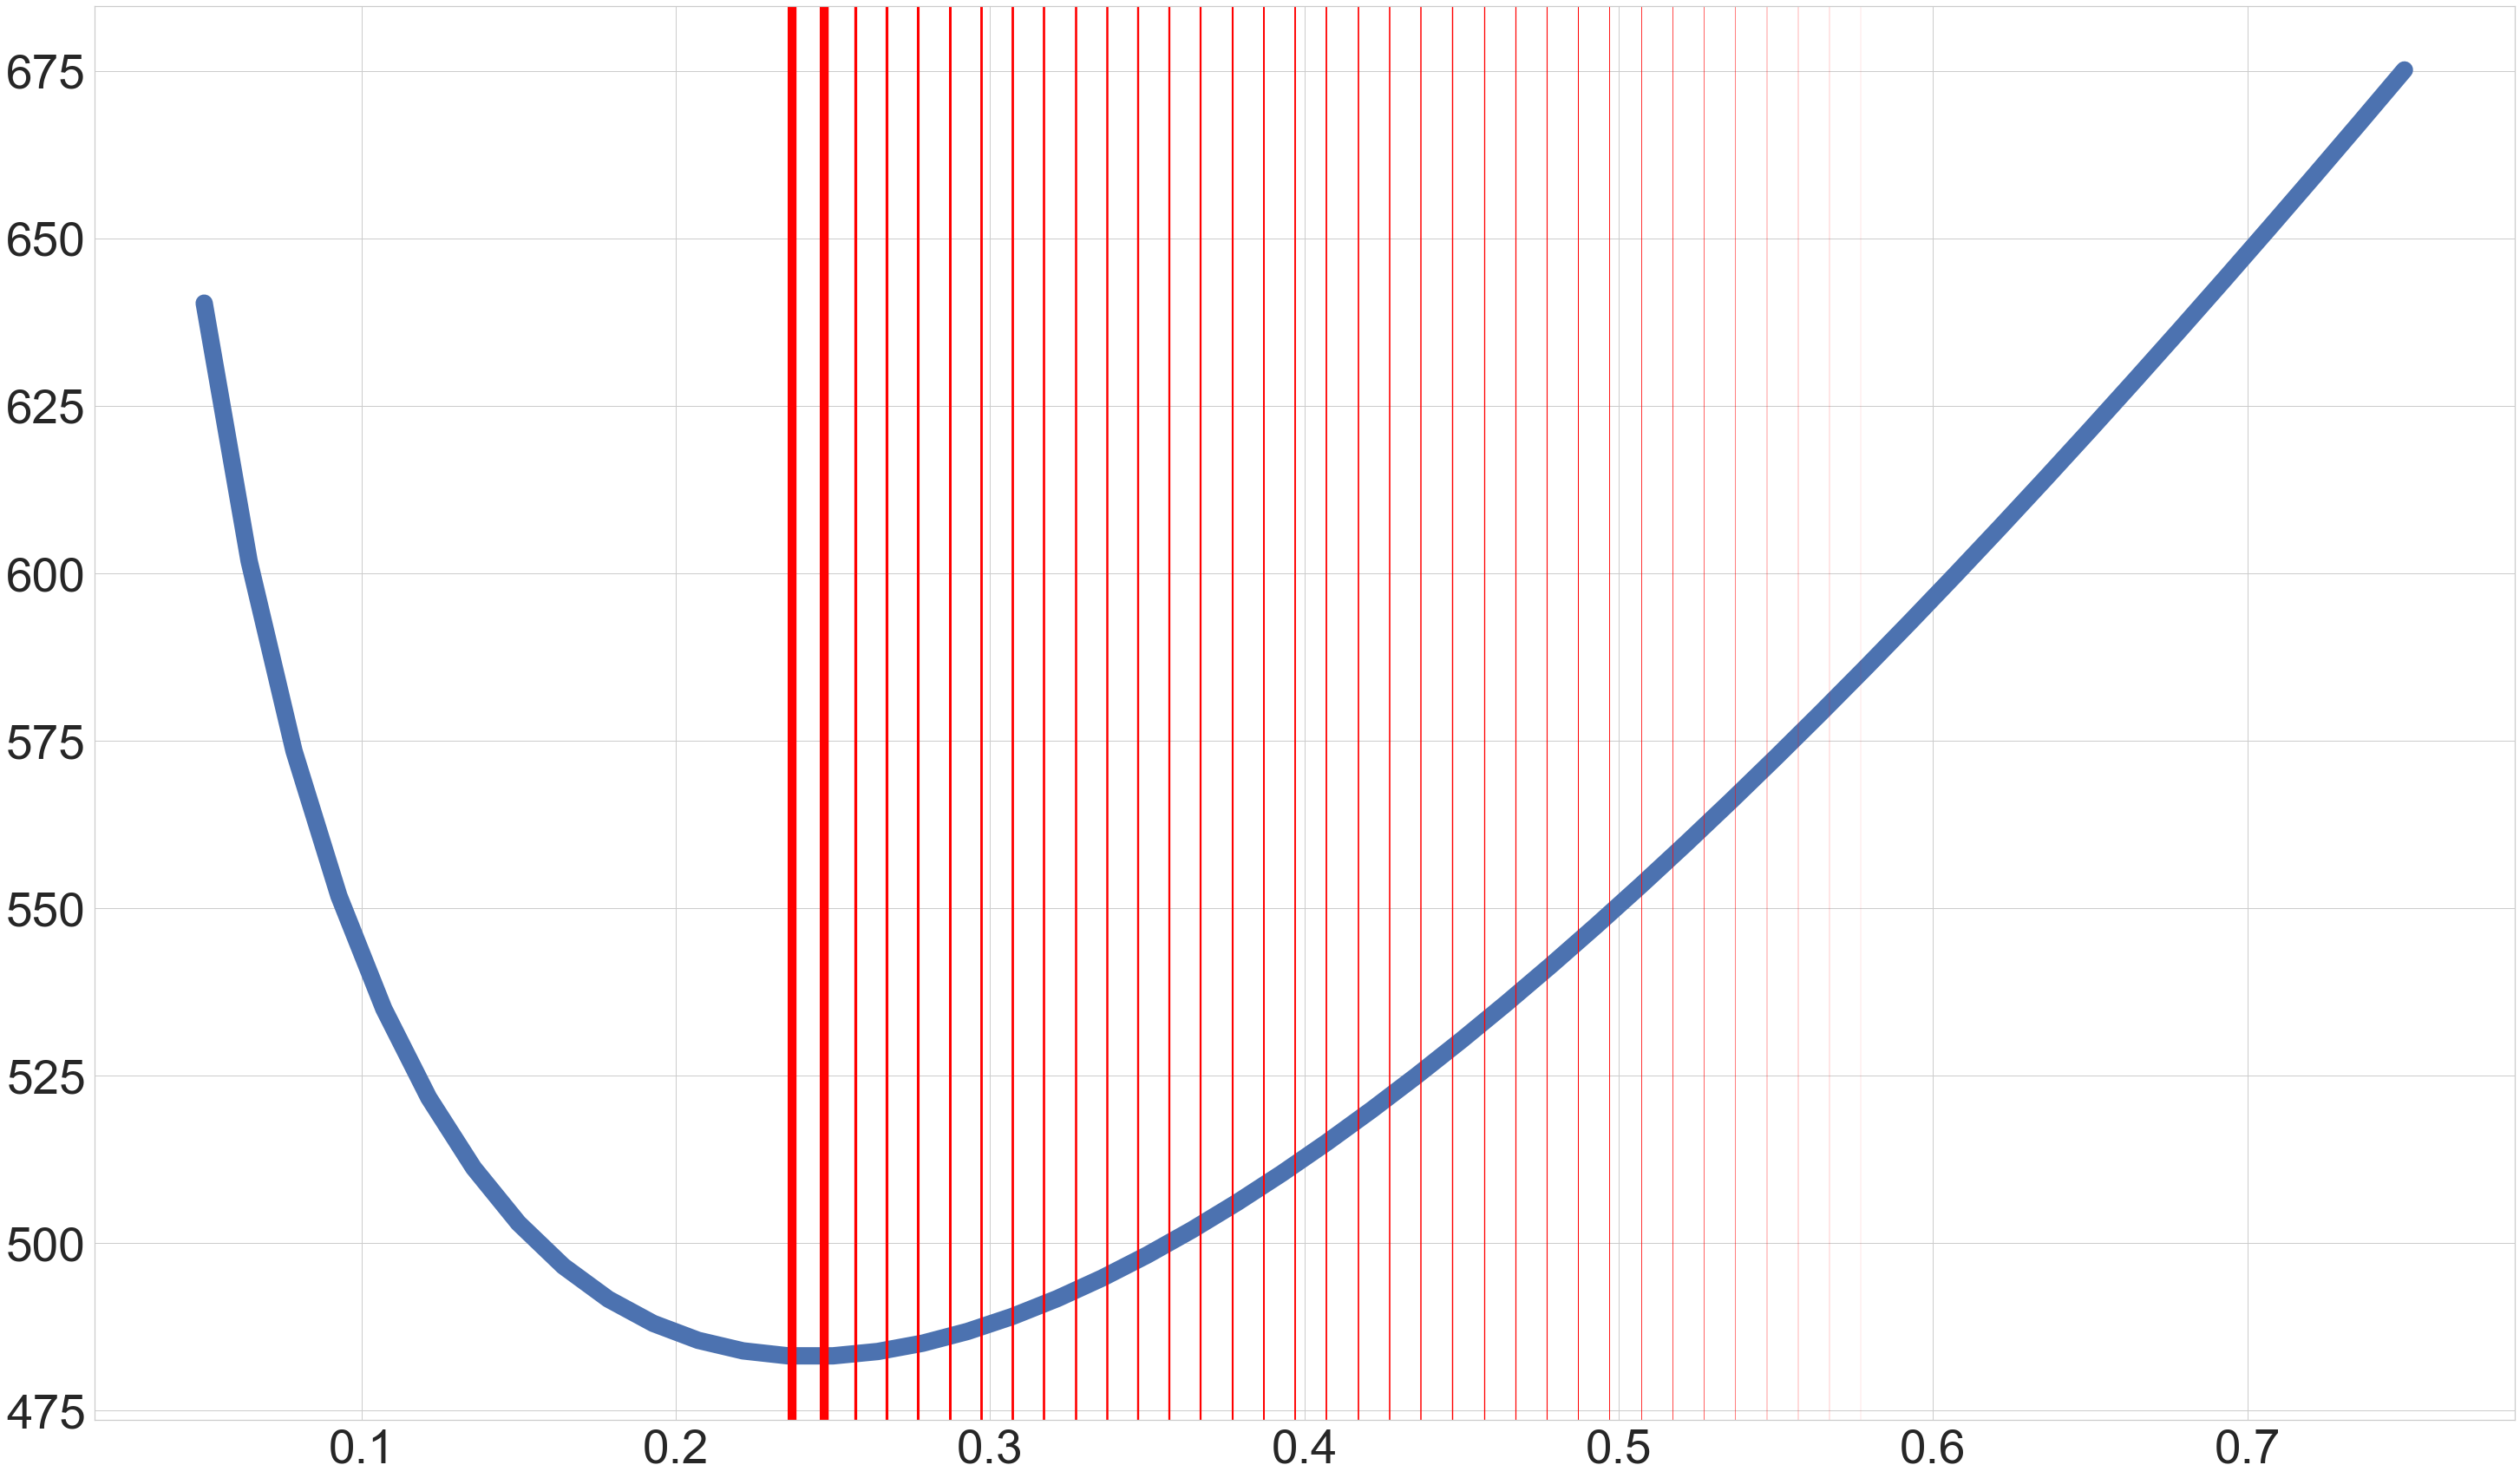

In [1107]:
gradient_descent(.01, 100)

Part 3: (40 points)

## Part 3: (40 points)

Suppose we have a training set of $m$ independently distributed samples 

$\{ (x_1,y_1), (x_2,y_2), (x_3,y_3), (x_3,y_3), (x_m,y_m)\}$

that is generated from a distribution $p_{data}(x,y)$

Assumming a Gaussian model

$p_{model}(y_i | x_i; \mathbf w) = \frac{1}{ \sqrt{2πσ^2}} exp(-\frac{(y_i - \mathbf w^T \mathbf x_i)^2}{2σ^2}) $

Write the expression of the Negative Log Likelihood function $NLL$. (10 points)

Write the parameters $\mathbf w$ and the $\sigma^2$ that minimize the NLL (10 points)

Write a Python script that uses SGD to converge to $\mathbf w_{ML}$ and $\sigma_{ML}^2$ for the following dataset (20 points)

HINT: You may need to estimate the conditional mean first and then the variance of the Gaussian $p_{model}$ 


***

The negative likelihood is the ln of the likihood function,

$$NLL(\Theta) = - l(\mu, \sigma^2; x_1...x_m) = - ln(L(\mu,\sigma^2; x_1...x_m))$$

The log likeihood expands to the joint probability distribution of the data given the parameters. 

$$= - ln(\prod_{i=1}^m f_X(x_j;\mu, \sigma^2)) = ln((2\pi\sigma^2)^{-n/2} exp({-\frac{1}{2 \sigma^2} \sum_{j=1}^{m}(x_j - \mu)^2)})$$

The log of a product is equal to the sum of the logs, as we see expanded below.

$$= -1 * [ln((2\pi)^{-n/2}) + ln((\sigma^2)^{-n/2}) + ln(exp(-\frac{1}{2 \sigma^2} \sum_{j=1}^{m}(x_j - \mu)^2))]$$


$log(a)^b = b * log(a)$, therefore the above expression, and the entire $NNL(\Theta)$ can be written as

$$= \frac{n}{2} ln(2 \pi) + \frac{n}{2}ln(\sigma^2) + (\frac{1}{2 \sigma^2} \sum_{j=1}^{m}(x_j - \mu)^2)$$

The parameters that minimize the NNL for this distribution are:
$$ \textbf{w} = \hat\mu = \frac {1}{n} \sum_{j=1}^m x_j$$
$$\sigma^2 = \frac{1}{n} \sum_{j=1}^m (x_j - \hat\mu)^2$$

Now we will compute the maximum likelihood estimates of $\mu$ and $\sigma$

In [1298]:
def init_weights(dim):
    """initialize the values of mu and sigma"""
    sigma=random.random()
    mu=np.random.rand(dim)
    return mu, sigma

def nll(mu, sigma, data):
    """defines and computes the negative log likelihood for the normal distribution"""
    n = len(data)
    return ((n/2 * np.log(2 * np.pi)) + (n/2 * np.log(2 * np.pi)) + ((1/2*sigma) * sum(data - mu) ** 2))

def nll_prime_mu(mu, sigma, data):
    """computes the partial derivative of negative log likelihood with respect to mu"""
    n = len(data)
    return (sum(data)) - (n * mu)

def nll_prime_sigma(mu, sigma, data):
    """computes the partial derivative of negative log likelihood with respect to mu"""
    n=len(data)
    return (-n * sigma) + sum(data - mu)**2

def update_mu(current_mu, alpha, data):
    """updates our hypothesized for mu by the increment alpha in the direction of the sign of the derivative."""
    new_mu = current_mu - (alpha * - np.sign(nll_prime_mu(current_mu, alpha, data)))
    return new_mu

def update_sigma(current_sigma, alpha, data):
    """updates our hypothesized for sigma by the increment alpha in the direction of the sign of the derivative."""
    new_sigma = current_sigma - (alpha * - np.sign(nll_prime_sigma(current_sigma,alpha,data)))
    return new_sigma

def gradient_descent(alpha, iterations):
    """implements gradient descent given learning rate alpha and number of iterations."""
    mu, sigma=init_weights(1)
    for i in range(iterations):
        sigma=update_sigma(sigma, alpha, x)
    for i in range(iterations):
        mu=update_mu(mu, alpha, x)
    return(mu, sigma)


In [1300]:
print(f'''Final sigma estiamte {gradient_descent(0.1, 1000)[1]} Final mu estiamte {gradient_descent(0.1, 1000)[0]/2}''')

Final sigma estiamte 29.91718874634535 Final mu estiamte [14.99312175]
